## Ejemplo de preprocesado de datos

Los datos en crudo se pueden encontrar en la dirrección: https://archive.ics.uci.edu/dataset/19/car+evaluation

### Explicación del Problema:
El problema es la evaluación de la aceptabilidad de los automóviles basada en varias caracteristicas: *nivel de precio de compra*, *nivel del mantenimiento*, *número de puertas*, *tamaño del maletero*, *seguridad del carro*, entre otras. 

El objetivo es predecir la aceptabilidad del automóvil.
##### Variable objetivo:
La variable objetivo es la columna **class** la cual indica la aceptabilidad del automovil. Podría clasificarse como una variable categórica con valores como: 
- unacc : " inaceptable"
- acc  :  " aceptable"
- vgood:  " muy bueno" 
- good:   " bueno"
##### Variables de entrada:
Las variables de entrada son las demas columnas del dataset, como: **Buying**, **Maintenance**, **Doors**, **Person**, **lug_boot** y **safety**. Estas variables representan diferentes caracteristicas del automóvil que podrían influir en su acceptabilidad.  
##### Utilidad de la posible solución:
Al predecir la aceptabilidad de cada automóvil basado en sus caracteristicas podría ser util para los compradores de automóviles, fabricantes, vendedores, etc., para tomar decisiones sobre la compra, fabricación y regulación de los automóviles.

### Importe de librerías y cargue del dataset

In [37]:
# importe de librerías
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv("dataset_car.csv", delimiter=';')

In [60]:
df.sample(5)

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
1321,low,vhigh,2,2,big,high,unacc
1737,low,low,5more,4,big,high,vgood
1736,low,low,5more,4,big,high,vgood
406,vhigh,low,4,more,small,low,unacc
59,vhigh,vhigh,4,2,small,low,unacc


### Caracterización del Dataset

In [61]:
# Resumen estadistico del dataset
print(df.describe())

       Buying Maintenance Doors Person lug_boot safety  class
count    1750        1750  1750   1750     1750   1750   1750
unique      4           4     4      3        3      3      4
top     vhigh         low     2      4      big   high  unacc
freq      443         447   444    587      585    590   1215


In [62]:
# Número de clases de la variable objetivo "class"
df['class'].value_counts()

class
unacc    1215
acc       390
good       75
vgood      70
Name: count, dtype: int64

In [63]:
# Número de instancias en total
print(df.shape)

(1750, 7)


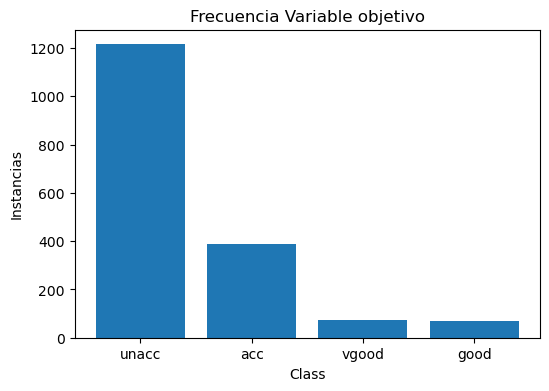

In [64]:
plt.figure(figsize=(6, 4))
plt.bar(df['class'].unique(), list(df['class'].value_counts()))
plt.title('Frecuencia Variable objetivo')
plt.xlabel('Class')
plt.ylabel('Instancias')
plt.show()

### Preprocesado

In [65]:
#mapeamos los valores de Buying  0,1..3 respectivamente
d1 = {'vhigh': 0, 'high':1,'med':2,'low':3}
df['Buying'] = df['Buying'].map(d1)

# Mostrar el DataFrame resultante con las nuevas columnas indexadas
df

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,0,vhigh,2,2,small,low,unacc
1,0,vhigh,2,2,small,med,unacc
2,0,vhigh,2,2,small,high,unacc
3,0,vhigh,2,2,med,low,unacc
4,0,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1745,3,low,5more,more,med,high,vgood
1746,3,low,5more,more,med,high,vgood
1747,3,low,5more,more,big,low,unacc
1748,3,low,5more,more,big,med,good


In [66]:
# Mapeamos los valores de Maintenance 0,1..3 respectivamente
d2 = {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3}
df['Maintenance'] = df['Maintenance'].map(d2)

# Mostrar el DataFrame resultante con las nuevas columnas indexadas
df

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,0,0,2,2,small,low,unacc
1,0,0,2,2,small,med,unacc
2,0,0,2,2,small,high,unacc
3,0,0,2,2,med,low,unacc
4,0,0,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1745,3,3,5more,more,med,high,vgood
1746,3,3,5more,more,med,high,vgood
1747,3,3,5more,more,big,low,unacc
1748,3,3,5more,more,big,med,good


In [67]:
df['Doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [68]:
#reemplazamos el valor 5more en Doors por 5
d2 = {'2': 2, '3': 2, '4': 4, '5more': 5}
df['Doors'] = df['Doors'].map(d2)
# Mostrar el DataFrame resultante con las nuevas columnas indexadas
df

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,0,0,2,2,small,low,unacc
1,0,0,2,2,small,med,unacc
2,0,0,2,2,small,high,unacc
3,0,0,2,2,med,low,unacc
4,0,0,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1745,3,3,5,more,med,high,vgood
1746,3,3,5,more,med,high,vgood
1747,3,3,5,more,big,low,unacc
1748,3,3,5,more,big,med,good


In [69]:
df['Person'].unique()

array(['2', '4', 'more'], dtype=object)

In [70]:
# Mapeamos los valores de Person 0,1..2 respectivamente
d3 = {'2': 0, '4': 1, 'more': 2}
df['Person'] = df['Person'].map(d3)
    
# Mostrar el DataFrame resultante con las nuevas columnas indexadas
df

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,0,0,2,0,small,low,unacc
1,0,0,2,0,small,med,unacc
2,0,0,2,0,small,high,unacc
3,0,0,2,0,med,low,unacc
4,0,0,2,0,med,med,unacc
...,...,...,...,...,...,...,...
1745,3,3,5,2,med,high,vgood
1746,3,3,5,2,med,high,vgood
1747,3,3,5,2,big,low,unacc
1748,3,3,5,2,big,med,good


In [81]:
# Mapeamos los valores de lug_boot,safety respectivamente

d3 = {'small': 0, 'med': 1, 'big': 2}
df['lug_boot'] = df['lug_boot'].map(d3)

d2 = {'low': 0, 'med': 1, 'high': 2}
df['safety'] = df['safety'].map(d2)

# Mostrar el DataFrame resultante con las nuevas columnas indexadas
df

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,0,0,2,0,NaN,NaN,0
1,0,0,2,0,NaN,NaN,0
2,0,0,2,0,NaN,NaN,0
3,0,0,2,0,NaN,NaN,0
4,0,0,2,0,NaN,NaN,0
...,...,...,...,...,...,...,...
1745,3,3,5,2,NaN,NaN,2
1746,3,3,5,2,NaN,NaN,2
1747,3,3,5,2,NaN,NaN,0
1748,3,3,5,2,NaN,NaN,3


In [84]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df["class"] = enc.fit_transform(df["class"])
df

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,0,0,2,0,NaN,NaN,0
1,0,0,2,0,NaN,NaN,0
2,0,0,2,0,NaN,NaN,0
3,0,0,2,0,NaN,NaN,0
4,0,0,2,0,NaN,NaN,0
...,...,...,...,...,...,...,...
1745,3,3,5,2,NaN,NaN,2
1746,3,3,5,2,NaN,NaN,2
1747,3,3,5,2,NaN,NaN,0
1748,3,3,5,2,NaN,NaN,3


In [73]:
# identificamos cuantos valores nulos hay en el dataframe

df.isna().sum()

Buying            0
Maintenance       0
Doors             0
Person            0
lug_boot       1750
safety         1750
class             0
dtype: int64

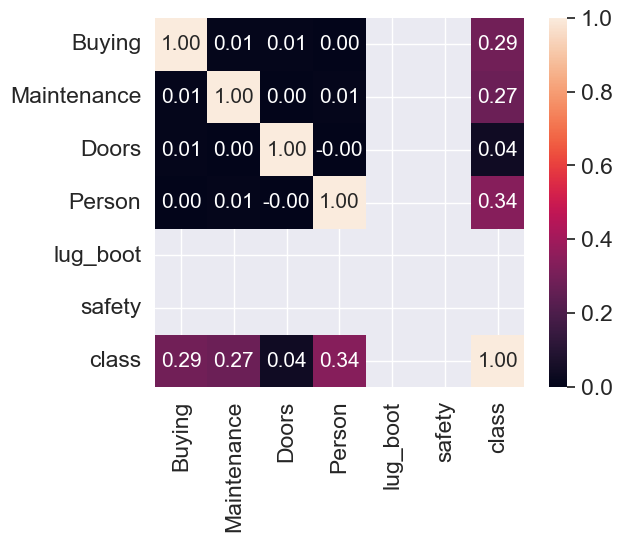

In [78]:
import numpy as np
import seaborn as sns
cols = cols = ['Buying','Maintenance','Doors', 'Person','lug_boot','safety','class']

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols,
                xticklabels=cols
                )
plt.show()

### División del dataset en datos de entrenamiento y datos de test 

In [80]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evluación planeada. Describa cuál es.

y = df.iloc[:,6].values
X = df.iloc[:,:-1].values
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.3, random_state=1)

### Ejemplo con OneHotEncoder con DataFrame de Prueba

In [85]:
# Ejemplo con LabelEncoder
import numpy as np
import pandas as pd

data = {'asistencia_clases': ['baja', 'media', 'alta', 'media', 'alta' ],
         'horas_estudio': [3,  8, 10, 4, 6],
        'Aprobado': ["Clase 1", "Clase 2", "Clase 2", "Clase 1", 'Clase 2']}

df = pd.DataFrame(data, columns = ['asistencia_clases', 'horas_estudio', 'Aprobado'])
df

,asistencia_clases,horas_estudio,Aprobado
0,baja,3,Clase 1
1,media,8,Clase 2
2,alta,10,Clase 2
3,media,4,Clase 1
4,alta,6,Clase 2


In [86]:
# OnehotEncoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['asistencia_clases']]).toarray(), columns=enc.categories_[0])
df2 = df.join(enc_df)
df2

,asistencia_clases,horas_estudio,Aprobado,alta,baja,media
0,baja,3,Clase 1,0.0,1.0,0.0
1,media,8,Clase 2,0.0,0.0,1.0
2,alta,10,Clase 2,1.0,0.0,0.0
3,media,4,Clase 1,0.0,0.0,1.0
4,alta,6,Clase 2,1.0,0.0,0.0


In [87]:
# GetDummies
df = pd.get_dummies(df, prefix="asistencia", columns=['asistencia_clases'])
print(df)

   horas_estudio Aprobado  asistencia_alta  asistencia_baja  asistencia_media
0              3  Clase 1            False             True             False
1              8  Clase 2            False            False              True
2             10  Clase 2             True            False             False
3              4  Clase 1            False            False              True
4              6  Clase 2             True            False             False


### Escalamiento de caracteristicas

In [88]:
# Normalización
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
horas_esc = min_max_scaler.fit_transform(df[["horas_estudio"]])
horas_esc

array([[0.        ],
       [0.71428571],
       [1.        ],
       [0.14285714],
       [0.42857143]])

In [89]:
# Estandarización
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
horas_esc = std_scaler.fit_transform(df[["horas_estudio"]])
horas_esc

array([[-1.2493901 ],
       [ 0.70278193],
       [ 1.48365074],
       [-0.85895569],
       [-0.07808688]])

In [90]:
std_scaler.inverse_transform(horas_esc)

array([[ 3.],
       [ 8.],
       [10.],
       [ 4.],
       [ 6.]])